<a href="https://colab.research.google.com/github/Joh-Ishimwe/Data-Preprocessing/blob/master/machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

df = pd.read_csv('final_dataset_ready_7.csv')

print("Dataset loaded. Shape:", df.shape)
print(df.head())

Dataset loaded. Shape: (418, 18)
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 100            1130       384.920989         4.218168   
1                 100            1113       175.928161         4.000000   
2                 100            1147       384.344822         4.600000   
3                 101            1059       425.420569         2.408380   
4                 101            1059       425.420569         2.408380   

   product_category_encoded purchase_date product_category  purchase_month  \
0                         0    2024-01-10            Books               1   
1                         1    2024-04-22         Clothing               4   
2                         0    2024-05-26            Books               5   
3                         0    2024-02-26        Groceries               2   
4                         0    2024-02-26        Groceries               2   

   avg_purchase_amount  days_since_last_purchas

In [13]:
# Creating a machine learning-ready copy
df_ml = df.dropna().copy()

# Encoding categorical columns
le = LabelEncoder()
for col in ['product_category', 'social_media_platform', 'review_sentiment']:
    df_ml.loc[:, col] = le.fit_transform(df_ml[col])

# Defining features (X) and target (y)
X = df_ml.drop(columns=['purchase_amount', 'customer_id_legacy', 'transaction_id',
                        'purchase_date', 'customer_id_new', 'legacy_id'])
y = df_ml['purchase_amount']

# Splittng into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Features in X:", X.columns.tolist())

Training set shape: (257, 12)
Testing set shape: (65, 12)
Features in X: ['customer_rating', 'product_category_encoded', 'product_category', 'purchase_month', 'avg_purchase_amount', 'days_since_last_purchase', 'social_media_platform', 'engagement_score', 'purchase_interest_score', 'review_sentiment', 'transaction_count', 'normalized_transactions']


In [15]:
# Initializing and training the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)

print("Model trained successfully!")

Model trained successfully!


In [17]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average CV R² Score: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

Mean Squared Error (MSE): 2304.33
Root Mean Squared Error (RMSE): 48.00
R² Score: 0.82
Cross-Validation R² Scores: [-0.00585179  0.60823694  0.25042636  0.46132462  0.34866099]
Average CV R² Score: 0.33 ± 0.21


Top 10 Feature Importances:
 avg_purchase_amount         0.511862
customer_rating             0.150417
days_since_last_purchase    0.099689
purchase_month              0.073712
product_category_encoded    0.065934
product_category            0.020523
engagement_score            0.017680
normalized_transactions     0.015464
purchase_interest_score     0.014455
transaction_count           0.012042
dtype: float64


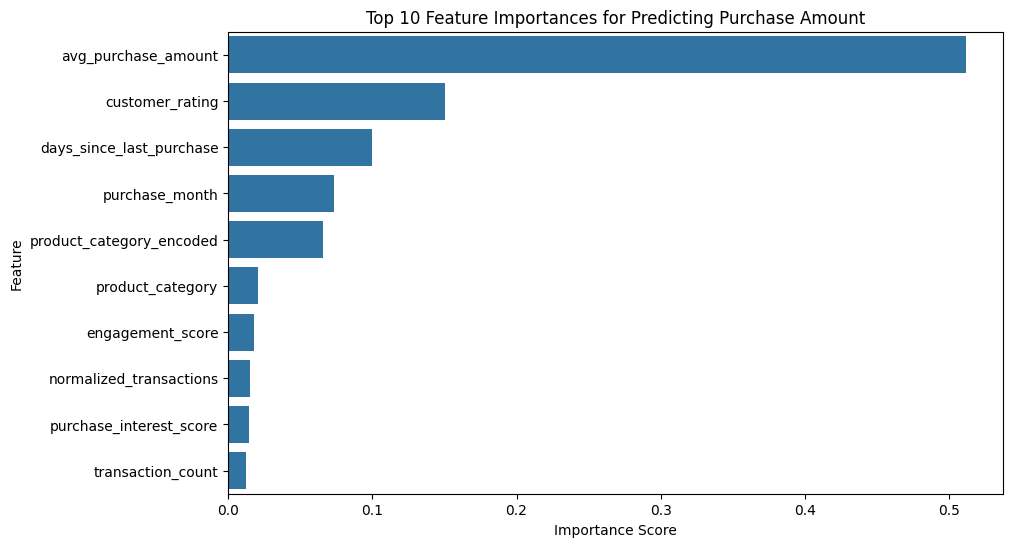

In [19]:
# Getting and displaying feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Feature Importances:\n", importances.head(10))

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10).values, y=importances.head(10).index)
plt.title('Top 10 Feature Importances for Predicting Purchase Amount')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Sample Predictions vs Actuals:
      Actual Purchase Amount  Predicted Purchase Amount
250              226.097961                 306.374231
185              366.622137                 330.424441
288              233.571992                 253.710072
12               153.777922                 153.345602
150              250.309645                 249.593620


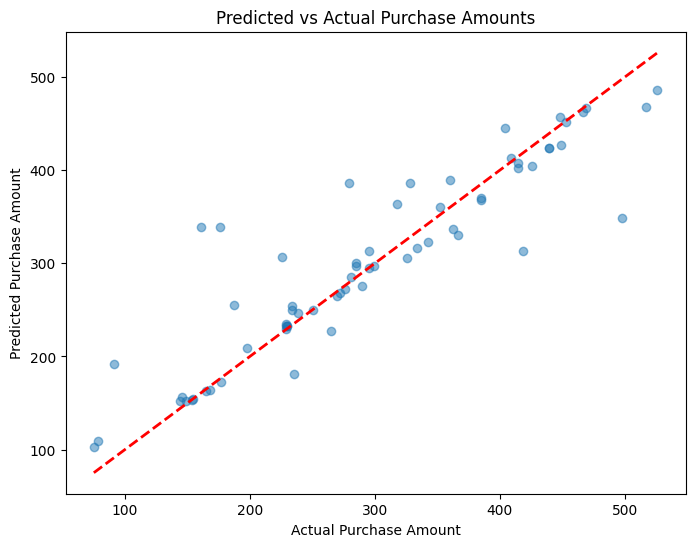

In [20]:
# Selecting a few test samples for prediction
sample_indices = X_test.index[:5]
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]
sample_y_pred = rf.predict(sample_X)

# Displaying predictions vs actuals
results = pd.DataFrame({
    'Actual Purchase Amount': sample_y_actual,
    'Predicted Purchase Amount': sample_y_pred
}, index=sample_indices)
print("Sample Predictions vs Actuals:\n", results)

# Visualizing predictions vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Predicted vs Actual Purchase Amounts')
plt.show()

Length of y_test: 65
Length of y_pred: 65
Length of X_test: 65
Shape of test_df: (65, 18)


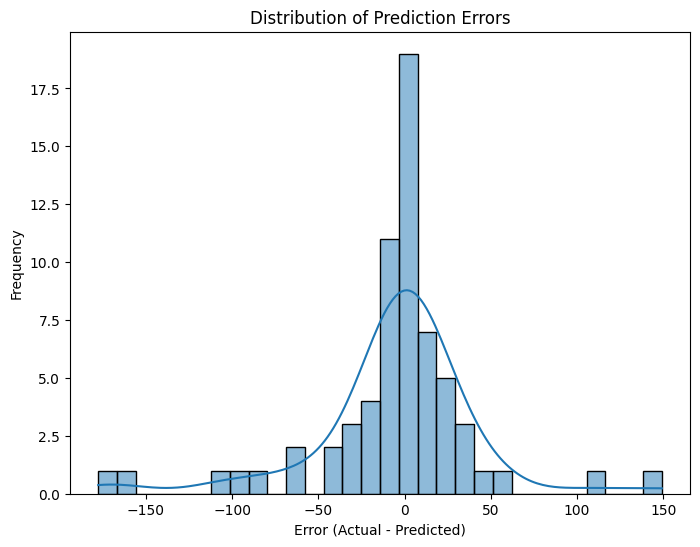

Average Prediction Error by Product Category:
 product_category
0    16.054796
1    -2.056270
2    -3.084373
3   -26.805581
4    -8.524316
Name: Error, dtype: float64

Number of Test Samples per Product Category:
 product_category
2    17
1    16
3    14
0    10
4     8
Name: count, dtype: int64


In [21]:
# Calculating prediction errors
errors = y_test - y_pred

# Verifying lengths match
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
print("Length of X_test:", len(X_test))

# Creating test DataFrame with proper index alignment
test_df = df_ml.loc[X_test.index].copy()
print("Shape of test_df:", test_df.shape)

# Assigning predictions and errors with explicit index alignment
test_df['Predicted'] = pd.Series(y_pred, index=X_test.index)
test_df['Error'] = pd.Series(errors, index=X_test.index)

# Plotting error distribution
plt.figure(figsize=(8, 6))
sns.histplot(test_df['Error'], bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# Analyzing errors by product category
error_by_category = test_df.groupby('product_category')['Error'].mean()
print("Average Prediction Error by Product Category:\n", error_by_category)

#  Displaying number of samples per category
category_counts = test_df['product_category'].value_counts()
print("\nNumber of Test Samples per Product Category:\n", category_counts)